In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [32]:
ratio = [0.2]

# for fmnist
seed = [12, 13, 17, 18, 29, 32, 50, 58, 77, 87]

# for mnist
#seed = [12, 17, 18, 29, 32, 41, 50, 58, 77, 87]

noniid = 0.4
where='fmnist'
where_origin='fmnist_origin'
epoch = 20

pre_round = [[] for i in range(len(seed))]
label_pre_round = [[] for i in range(len(seed))]

chosen_model = []

# for fmnist
if(ratio[0]<=0.1):
    target_label = [2]
elif(ratio[0]<=0.2):
    target_label = [2,4]
elif(ratio[0]<=0.3):
    target_label = [2,4,0]
elif(ratio[0]<=0.4):
    target_label = [2,4,0,3]
elif(ratio[0]<=0.5):
    target_label = [2,4,0,3,6]


In [33]:
# for fmnist
'''
if(ratio[0]<=0.1):
    target_label = [7]
elif(ratio[0]<=0.2):
    target_label = [7,3]
elif(ratio[0]<=0.3):
    target_label = [7,3,5]
elif(ratio[0]<=0.4):
    target_label = [7,3,5,1]
elif(ratio[0]<=0.5):
    target_label = [7,3,5,1,9]
'''

'\nif(ratio[0]<=0.1):\n    target_label = [7]\nelif(ratio[0]<=0.2):\n    target_label = [7,3]\nelif(ratio[0]<=0.3):\n    target_label = [7,3,5]\nelif(ratio[0]<=0.4):\n    target_label = [7,3,5,1]\nelif(ratio[0]<=0.5):\n    target_label = [7,3,5,1,9]\n'

In [34]:
for s in range(len(seed)):
    for r in ratio:
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/pre.txt'
        with open(path) as f:
            line = f.read()
            tmp = line.find("pt1")-3
            chosen_model.append(int(line[tmp]))

            
for s in range(len(seed)):
    for r in ratio:
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/a.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                if (line%10)==chosen_model[s]:
                    pre_round[s].append(lines[line])
    
    for i in range(len(pre_round[s])):
        pre_round[s][i] = eval(pre_round[s][i].split(" ")[3])

In [35]:
for s in range(len(seed)):
    for r in ratio:
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/pre.txt'
        with open(path) as f:
            line = f.read()
            tmp = line.find("pt1")-3
            chosen_model.append(int(line[tmp]))

            
for s in range(len(seed)):
    for r in ratio:
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/c.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                if (line%10)==chosen_model[s]:
                    label_pre_round[s].append(lines[line])
    
    for i in range(len(label_pre_round[s])):
        label_pre_round[s][i] = eval(label_pre_round[s][i].split(":")[1])
        tmp = []
        for j in target_label:
            tmp.append(label_pre_round[s][i][j])
        label_pre_round[s][i] = min(tmp)
            

In [36]:
log_round = [[] for i in range(len(seed))]
origin_round = [[] for i in range(len(seed))]
            
for s in range(len(seed)):
    for r in ratio:
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/b.txt'
        path2 = '/mnt/d/My_FL/My_FL/src/' + where_origin + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/e.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                log_round[s].append(lines[line])
                
        with open(path2) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                origin_round[s].append(lines[line])
    
    for i in range(len(log_round[s])):
        log_round[s][i] = eval(log_round[s][i].split(" ")[3])
    
    for i in range(len(origin_round[s])):
        origin_round[s][i] = eval(origin_round[s][i].split(" ")[3])

In [37]:
label_log_round = [[] for i in range(len(seed))]
label_origin_round = [[] for i in range(len(seed))]
            
for s in range(len(seed)):
    for r in ratio:
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/d.txt'
        path2 = '/mnt/d/My_FL/My_FL/src/' + where_origin + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/f.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                label_log_round[s].append(lines[line])
                
        with open(path2) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                label_origin_round[s].append(lines[line])
    
    for i in range(len(label_log_round[s])):
        label_log_round[s][i] = eval(label_log_round[s][i].split(":")[1])
        tmp = []
        for j in target_label:
            tmp.append(label_log_round[s][i][j])
        label_log_round[s][i] = min(tmp)
        
    for i in range(len(label_origin_round[s])):
        label_origin_round[s][i] = eval(label_origin_round[s][i].split(":")[1])
        tmp = []
        for j in target_label:
            tmp.append(label_origin_round[s][i][j])
        label_origin_round[s][i] = min(tmp)

In [38]:
hundred_round = [[] for i in range(len(seed))]

for s in range(len(seed)):
    hundred_round[s].extend(pre_round[s])
    hundred_round[s].extend(log_round[s])

In [39]:
label_hundred_round = [[] for i in range(len(seed))]

for s in range(len(seed)):
    label_hundred_round[s].extend(label_pre_round[s])
    label_hundred_round[s].extend(label_log_round[s])

In [40]:
mean_round = np.mean(np.array(hundred_round),0)
origin_mean_round = np.mean(np.array(origin_round),0)
print(len(mean_round))
print(mean_round)
std_round = np.std(np.array(hundred_round),0)
origin_std_round = np.std(np.array(origin_round),0)
print(len(std_round))
print(std_round)
max_round = mean_round + std_round
min_round = mean_round - std_round

tmp = np.max(np.array(hundred_round),0)
tmp2 = np.min(np.array(hundred_round),0)
for i in range(len(max_round)):
    if(tmp[i]<max_round[i]):
        max_round[i] = tmp[i]
    if(tmp2[i]>min_round[i]):
        min_round[i] = tmp2[i]

origin_max_round = origin_mean_round + origin_std_round
origin_min_round = origin_mean_round - origin_std_round

tmp = np.max(np.array(origin_round),0)
tmp2 = np.min(np.array(origin_round),0)
for i in range(len(origin_max_round)):
    if(tmp[i]<origin_max_round[i]):
        origin_max_round[i] = tmp[i]
    if(tmp2[i]>origin_min_round[i]):
        origin_min_round[i] = tmp2[i]


100
[0.65408001 0.73364001 0.75759    0.76675    0.77642    0.78519
 0.79339    0.80162    0.80395    0.8086     0.81268    0.81511999
 0.82153    0.82777    0.82764001 0.82882    0.83384    0.83495
 0.83952999 0.84216    0.84186    0.84398    0.84389    0.8458
 0.84631    0.84715    0.84823    0.8498     0.84896    0.85031
 0.85111    0.85318    0.85235    0.85472    0.85427    0.85423
 0.85536    0.85572    0.85548    0.85746    0.85865    0.8585
 0.85847    0.85877    0.86003    0.85955    0.86071    0.86119
 0.8621     0.86169    0.86222    0.86117    0.86254    0.86246
 0.86308    0.86271    0.86285    0.86453    0.86309    0.86373
 0.8629     0.86453    0.86464    0.8642     0.86514    0.86534
 0.86645    0.86663    0.86722    0.86705    0.86685    0.86594
 0.86554    0.8661     0.86748    0.8669     0.86838    0.86722
 0.86893    0.8688     0.86881    0.86814    0.86923    0.86922
 0.86994    0.86921    0.87037    0.86839    0.86974    0.8701
 0.86976    0.87071    0.86892    0.

In [41]:
label_mean_round = np.mean(np.array(label_hundred_round),0)
label_origin_mean_round = np.mean(np.array(label_origin_round),0)
print(len(label_mean_round))
print(label_mean_round)
label_std_round = np.std(np.array(label_hundred_round),0)
label_origin_std_round = np.std(np.array(label_origin_round),0)
print(len(label_std_round))
print(label_std_round)
label_max_round = label_mean_round + label_std_round
label_min_round = label_mean_round - label_std_round

tmp = np.max(np.array(label_hundred_round),0)
tmp2 = np.min(np.array(label_hundred_round),0)
for i in range(len(label_max_round)):
    if(tmp[i]<label_max_round[i]):
        label_max_round[i] = tmp[i]
    if(tmp2[i]>label_min_round[i]):
        label_min_round[i] = tmp2[i]


label_origin_max_round = label_origin_mean_round + label_origin_std_round
label_origin_min_round = label_origin_mean_round - label_origin_std_round

tmp = np.max(np.array(label_origin_round),0)
tmp2 = np.min(np.array(label_origin_round),0)
for i in range(len(label_origin_max_round)):
    if(tmp[i]<label_origin_max_round[i]):
        label_origin_max_round[i] = tmp[i]
    if(tmp2[i]>label_origin_min_round[i]):
        label_origin_min_round[i] = tmp2[i]


100
[0.0662     0.2653     0.36750001 0.39070001 0.4361     0.4642
 0.4917     0.5296     0.5238     0.5446     0.5626     0.5625
 0.6022     0.64229999 0.62029999 0.6274     0.6525     0.6456
 0.6716     0.689      0.67340001 0.68659999 0.67390001 0.68559999
 0.6809     0.6818     0.6943     0.696      0.6796     0.68929999
 0.69139999 0.7033     0.6887     0.71000001 0.7084     0.6964
 0.7025     0.70629999 0.696      0.7077     0.7228     0.71209999
 0.70859999 0.71       0.7113     0.7095     0.71109999 0.71709999
 0.7226     0.71710001 0.72229999 0.7059     0.72       0.71479999
 0.72       0.7114     0.7143     0.7281     0.7072     0.719
 0.7066     0.71       0.71389999 0.716      0.7155     0.71709999
 0.72570001 0.73010001 0.7295     0.7256     0.71660001 0.7137
 0.7089     0.70899999 0.72310001 0.7064     0.7238     0.7153
 0.7355     0.7297     0.72200001 0.7191     0.72729999 0.7284
 0.7284     0.7211     0.7352     0.716      0.72560001 0.72499999
 0.7215     0.7344     0

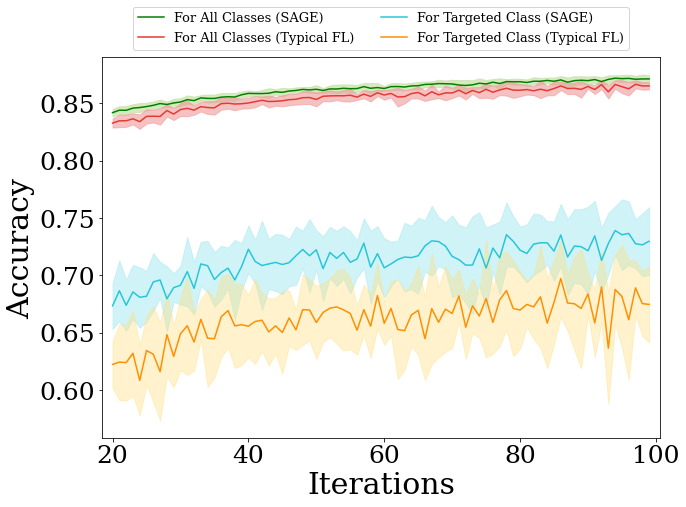

In [42]:
round = [i for i in range(20,100)]

fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlabel("Iterations",fontsize=30)
ax.set_ylabel("Accuracy",fontsize=30)
ax.set_xticks([20,40,60,80,100])
#ax.set_yticks([0.95,0.85,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05])
#ax.set_ylim(0.,1)
ax.tick_params(labelsize=25)

#y_round = [0.90,0.89,0.88,0.87,0.86,0.85,0.84,0.83,0.82,0.81,0.80]
#ax.set_yticks(y_round)

ax.plot(round, mean_round[20:], c = 'green', label='For All Classes (SAGE)')
ax.fill_between(round, max_round[20:], min_round[20:], color = "#C5E1A5", alpha=0.7)

ax.plot(round, origin_mean_round[20:], c = '#e53935', label='For All Classes (Typical FL)')
ax.fill_between(round, origin_max_round[20:], origin_min_round[20:], color = "#ef9a9a", alpha=0.6)

#ax.legend(loc='upper center',bbox_to_anchor =(0.5, 1.15),ncol=4,fontsize=12)

ax.plot(round, label_mean_round[20:], c = '#26C6DA', label='For Targeted Class (SAGE)')
ax.fill_between(round, label_max_round[20:], label_min_round[20:], color = "#B2EBF2", alpha=0.6)

ax.plot(round, label_origin_mean_round[20:], c = '#FF8F00', label='For Targeted Class (Typical FL)')
ax.fill_between(round, label_origin_max_round[20:], label_origin_min_round[20:], color = "#FFE082", alpha=0.4)

ax.legend(loc='upper center',bbox_to_anchor =(0.5, 1.15),ncol=2,fontsize=13)
ax.margins(x=0.02) 